In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
#import molplotly
from CombineMols.CombineMols import CombineMols
import QCflow
from QCflow.load_gaussian import *
from QCflow.energy_calculations import *
from QCflow.torsion_parser import *
from QCflow.find_torsion import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
funnel_data = pd.read_csv('../Data/Funnel/funnel_planarity_energy_gap_data.csv')

In [3]:
funnel_data

,Name,SMILES,HOMO /eV,LUMO /eV,EG /eV,Planarity,SA Score,Linker Type,Fragment Functional Group,Eumelanin Type,Eumelanin Func Type,Eumelanin Bonded Type,Eumelanin Linker Type
0,0_29_single_A,COc1cc2cc[nH]c2c(C2:c(OC(C)=O)ccc3nsnc:23)c1OC,-5.166226,-2.357010,2.809216,0.321061,2.893192,single,Acetate,DHI,Unmethlyated,7 - DHI,single
1,0_30_single_A,COc1cc2cc[nH]c2c(C2:c(NC(C)=O)ccc3nsnc:23)c1OC,-5.489471,-2.267504,3.221966,0.502411,2.852034,single,Amide,DHI,Unmethlyated,7 - DHI,single
2,0_31_single_A,CNc1ccc2nsnc2:C:1c1c(OC)c(OC)cc2cc[nH]c12,-5.216125,-1.957954,3.258171,0.180340,2.934976,single,Amine,DHI,Unmethlyated,7 - DHI,single
3,0_32_single_A,COc1cc2cc[nH]c2c(C2:c(OC)ccc3nsnc:23)c1OC,-5.119629,-2.216338,2.903291,0.505492,2.795423,single,Methoxy,DHI,Unmethlyated,7 - DHI,single
4,0_33_single_A,COc1cc2cc[nH]c2c(C2:c(C=O)ccc3nsnc:23)c1OC,-5.517050,-2.776521,2.740529,0.548607,2.984218,single,carbonyl,DHI,Unmethlyated,7 - DHI,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14358,9_349_thio_B,COc1cc(C2:c(S(=O)(=O)O)ccc3nccnc:23)sc1-c1c(OC...,-5.742282,-2.518156,3.224126,0.097523,3.178991,thio,Sulfonic Acid,DHICA,Methylated,4 - DHICA,thio
14359,9_350_thio_B,COc1cc(C2:c(C(F)(F)F)ccc3nccnc:23)sc1-c1c(OC)c...,-5.183312,-2.366770,2.816542,0.544367,3.168854,thio,Trifloro,DHICA,Methylated,4 - DHICA,thio
14360,9_351_thio_B,COc1cc(C2:c(F)ccc3nccnc:23)sc1-c1c(OC)c(OC)cc2...,-5.078232,-2.242814,2.835419,0.771812,3.047730,thio,F,DHICA,Methylated,4 - DHICA,thio
14361,9_354_thio_B,COc1cc(C2:c(Br)ccc3nccnc:23)sc1-c1c(OC)c(OC)cc...,-5.166143,-2.235253,2.930890,0.550831,3.092082,thio,Br,DHICA,Methylated,4 - DHICA,thio


In [7]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [8]:
blind = sns.color_palette("colorblind")

In [9]:
colors = [blind.as_hex()[0], blind.as_hex()[3], blind.as_hex()[4], blind.as_hex()[8], blind.as_hex()[2]]

In [10]:
width = 7 * 0.3937
height = 5 * 0.3937

<Figure size 3858.26x2755.9 with 0 Axes>

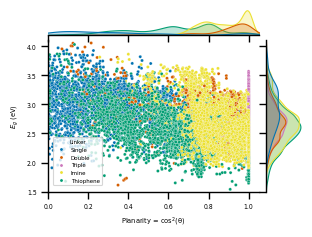

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(width, height), dpi=1400)
sns.set_context("paper", font_scale=0.5)

h = sns.jointplot(data=funnel_data, x='Planarity', y='EG /eV', hue='Linker Type', marker='o',palette=colors, s=5)
h.ax_joint.set_xlabel('Planarity = cos$^2$(θ)')
h.ax_joint.set_ylabel('$E_g$ (eV)')
h.ax_joint.legend(title='Linker', bbox_to_anchor=(0.01, 0.38), loc='upper left', fontsize='small', title_fontsize='small')
h.ax_joint.set_xlim(0, 1.05)
h.ax_joint.set_ylim(1.5, 4.1)
#h.ax_joint.add_patch(plt.Rectangle((0.82, 1.5), 1.5, 2.5, edgecolor='black', linestyle='dotted', facecolor='grey', alpha=0.5))

# Save the figure using the fig object
h.fig.set_size_inches(width, height)
h.fig.savefig('p_eg_paper_size.png', bbox_inches='tight', dpi=1400)
plt.show()